# 역전파 알고리즘
- Supervised Learning
- 전파(propagation) 단계
    - 학습 데이터로부터 실제 출력값을 구하고 목적값(정답)과 실제 출력값의 차이인 오차를 계산하여 각층에 대해 역순으로 전달
- 가중치 갱신 / 수정 단계
    - 전파된 오차를 이용하여 가중치를 갱신
- 은닉층이 포함된 <span style="color:red">다층 신경망</span>을 학습할 수 있는 알고리즘
    - 역전파 이전에는 은닉층의 목적값(정답)을 결정할 수 없었기 때문에 2층 이상의 신경망을 학습시킬 수 없었음
    
    
- http://untitledtblog.tistory.com/90 (수식정리 참고)
- http://llnntms.tistory.com/31 (개념 및 수식정리 참고)

- 최종 타겟만 알지 은닉층의 값이 무엇이 나와야 하는지는 알 수 없었지... back propagation 전에는
- 은닉층의 타겟값을 만들어 줘서, 은닉층 예측값과 비교해서 조정!?! 
- weight를 얼마만큼 조정하면, 출력의 오차가 얼마만큼 변하는지. 그것을 층마다 해주는거다. 
<img src="picture/back_propagation_math.png" />

### 계산 그래프
- Computation graph
    - 계산 과정을 그래프로 나타낸 것
        - 노드(node): 연산 내용
        - 에지(edge): 값, 계산 결과
        
    - 계산 그래프를 이용한 문제 풀이
        - 계산 그래프 구성
        - 그래프에서 계산을 왼쪽에서 오른쪽으로 진행
            - 순전파(forward-propagation)
        - 오른쪽에서 왼쪽으로 계산 진행
            - 역전파(back-propagation) - 역전파는 미분값을 넘겨주게 되어 있다.

### 계산 그래프에 익숙해지기
- 문제1: 맹구는 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이때 지불 금액을 구하세요. 단, 소비세가 10% 부과됩니다.
<img src="picture/calculate graph.png" />

- 문제2: 맹구는 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150원입니다. 소비세가 10%일 때 치를 금액을 구하세요. (덧셈이 추가됨)

<img src="picture/calculate graph2.png" />

### 국소적 계산
- 계산 그래프
    - 국소적 계산 결과를 전파함으로써 최종 결과를 얻음
        - 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 충분
    - 국소적
        - 자신과 직접 관련된 작은 범위

<img src="picture/calculate graph3.png" />

### 왜 계산 그리프인가?
- 계산 그래프의 이점
    - 국소적 계산
    - 중간 계산 결과 보관
    - **역전파를 통해 '미분'을 효율적으로 계산**
    - 재귀로 돌리면 된다!! 

- 역전파에 의한 미분 값의 전달
    - '국소적 미분'을 전달
    - 사과 1월 오르면 -> 총 금액은 2.2원 오른다.
        - 사과 값이 아주 조금 오르면 총 금액은 그 아주 작은 값의 2.2배 만큼 증가

<img src="picture/calculate graph4.png" />

- 맨 마지막 1은 (최종결과 미분 / 최종결과 미분) 값 이다!! / 미분=변화량 
- 2.2는 (총금액 미분 / 사과금액 미분)

### 연쇄 법칙(Chain Rule)
- 계산 그래프에서 국소적 미분이 역전파로 전달되는 원리
- 계산 그래프의 역전파
    - 순방향과 반대 방향으로 **국소적 미분**을 **곱**한다.
    <img src="picture/back_propagation.png" />
    - 연쇄법칙에 의해 가능

- 역방향 갈 때 E -> 미분y/미분x -> E*(미분y/미분x) 이라고 생각하자!! 

### 연쇄 법칙
- 합성 함수
    - 여러 함수로 구성된 함수
    <img src="picture/합성함수.PNG" />
    
    

- 연쇄 법칙
    - 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.
    <img src="picture/연쇄법칙.PNG" />

- 연쇄 법칙과 계산 그래프
<img src="picture/연쇄법칙과 계산그래프.png" />

<img src="picture/by_me.jpg" />

<img src="picture/연쇄법칙과 계산그래프2.png" />

1 X 2(x+y) X 1 이지!! 

- 덧셈 노드의 역전파
    - 역전파된 미분값을 왼쪽으로 그대로 전달
    - z = x + y 의 미분 
    
<img src="picture/연쇄법칙과 계산그래프3.png" />

2x+y 면 (미분z/미분x)가 2가 되지!! 근데 극소적으로 보면 2x는 2*x로 하나의 합성함수이지 분리해서 볼 수 있지!! 그래서 일단 덧셈에서는 1을 곱하고 2곱은 뒤 에서 처리 할 수 있지 나눠서!! 
- 그래서 역전파 "+" 일 때는 미분값을 (1곱후) 그냥 넘겨준다고 생각하면 된다!! 

- 덧셈 노드 역전파의 구체적 예

<img src="picture/add_back_ex.png" />

- 곱셈 노드의 역전파
    - 역전파된 미분값에 순전파 때의 입력신호를 서로 바꾼 값을 곱해서 왼쪽으로 전달
    - z = xy의 미분 (편미분 할 수 있지!! )
    
<img src="picture/multiple_backpropagation.png" />

- 뺄셈과 나눗셈도 덧셈과 곱셈을 이용해서 할 수 있지 당연히!!!

- 곱셈노드 역전파의 구체적 예

<img src="picture/multi_ex_backpropagation.png" />

### 역전파
- 사과 쇼핑의 역전파 예
    - 사과의 가격의 총 금액에 어떤 영향을 주는가?
        - 사과 가격에 대한 지불 금액의 미분
    - 사과 개수에 대한 지불 금액의 미분
    - 소비세에 대한 지불 금액의 미분
    
    
- 곱으로 역전파 되는 값들의 변화 이해해야 한다. 편미분 한 값을 활용하는 거지!!! 


<img src="picture/apple_back_propagation.png" />

backpropagation에 적어진 Gradient[ex)2.2]의 변화로 최종값의 오차를 변화시키는 것이다!!!

- 사과와 귤 쇼핑의 역전파 예

<img src="picture/EX_quiz.png" />

### 계산 그래프 노드 구현
- 곱셈 노드
    - MulLayer 클래스 (ch05/layer_navie.py)
        - 역전파 때 사용하기 위해 순전파 시 입력값을 저장
    - 순전파, 역전파 (ch05/buy_apple.py) 

- 덧셈 노드
    - AddLayer 클래스 (ch05/layer_naive.py)
        - 미분을 그대로 전파하므로 입력을 별도로 저장할 필요 없음
- 순전파, 역전파 (ch05/buy_apple_orange.py)

In [2]:
class MulLayer: # 곱셈 노드 class화!
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y): # 순전파!!
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout): # 역전파!!  # dout 출력값의 미분을 받아서 back 계산! 
        dx = dout * self.y  # x와 y를 바꾼다. 곱의 편미분 때문에!! 
        dy = dout * self.x

        return dx, dy

class AddLayer: # 덧셈 노드 class화!
    def __init__(self):
        pass # 미분값을 뒤로 그대로 넘겨 주기 때문에!! 

    def forward(self, x, y):
        out = x + y

        return out

    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1

        return dx, dy

In [3]:
pwd

'C:\\pydev\\Machine_Learning\\MLiA_py3\\DeepLearning'

In [6]:
%cd origin/ch05

C:\pydev\Machine_Learning\MLiA_py3\DeepLearning\origin\ch05


### 사과 쇼핑 역전파 예 Code ###

In [8]:
import numpy as np
from layer_naive import * 

In [10]:
apple_price = 100
apple_num = 2
tax = 1.1

#### 계산식 구성, 노드 준비

In [11]:
mul_apple_node = MulLayer() # 곱셈노드!! 
mul_tax_node = MulLayer()

#### 순전파

In [13]:
apple_total_price = mul_apple_node.forward(apple_price, apple_num)
total_price = mul_tax_node.forward(apple_total_price, tax)

In [14]:
print(total_price)

220.00000000000003


#### 역전파

In [18]:
d_total_price = 1 # (미분 최종금액 / 미분 최종금액)
d_apple_total_price, d_tax = mul_tax_node.backward(d_total_price) # return 순서 잘 시켜야 하지!! 
d_apple_price, d_apple_num = mul_apple_node.backward(d_apple_total_price)

In [20]:
print(d_apple_price, "/", d_apple_num, "/", d_tax)

2.2 / 110.00000000000001 / 200


### 사과와 귤 쇼핑의 역전파 예 Code ###


In [46]:
import numpy as np
from layer_naive import * 

In [47]:
apple_count = 2
apple_price = 100
orange_price = 150
orange_count = 3
tax = 1.1

#### 계산식 구성, 노드 준비

In [48]:
mul_apple_node = MulLayer() # 곱셈노드!! 
mul_orange_node = MulLayer()
mul_tax_node = MulLayer()
add_apple_orange = AddLayer()

#### 순전파


In [49]:
apple_total_price = mul_apple_node.forward(apple_count, apple_price)
orange_total_price = mul_orange_node.forward(orange_price, orange_count)
total_price = add_apple_orange.forward(apple_total_price, orange_total_price)
total_price_with_tax = mul_tax_node.forward(total_price, tax)

In [50]:
print(total_price_with_tax)

715.0000000000001


#### 역전파

In [51]:
d_total_price_with_tax = 1 # (미분 최종금액 / 미분 최종금액)
d_total_price, d_tax = mul_tax_node.backward(d_total_price_with_tax) # return 순서 잘 시켜야 하지!! 
d_apple_total_price, d_orange_total_price = add_apple_orange.backward(d_total_price)

In [52]:
d_apple_count, d_apple_price = mul_apple_node.backward(d_apple_total_price)
d_orange_price, d_orange_count = mul_orange_node.backward(d_orange_total_price)

In [55]:
print("d_총가격=>", d_total_price)
print("d_tax=>", d_tax)
print("d_사과총가격=>",d_apple_total_price)
print("d_귤총가격=>",d_orange_total_price)
print("d_사과 count=>",d_apple_count)
print("d_사과가격=>",d_apple_price)
print("d_귤가격=>",d_orange_price)
print("d_귤 count=>",d_orange_count)

d_총가격=> 1.1
d_tax=> 650
d_사과총가격=> 1.1
d_귤총가격=> 1.1
d_사과 count=> 110.00000000000001
d_사과가격=> 2.2
d_귤가격=> 3.3000000000000003
d_귤 count=> 165.0


#### ↑ 곱셍이나 덧셈이 여러개인 경우 하나하나 분리해서 하면 된다!!!

### 활성화 함수 계산 그래프 노드 구현
- ReLU 노드
    - common/layers.py
    
<img src="picture/ReLU_node.png" />

In [56]:
pwd

'C:\\pydev\\Machine_Learning\\MLiA_py3\\DeepLearning\\origin\\ch05'

In [58]:
%cd ..

C:\pydev\Machine_Learning\MLiA_py3\DeepLearning\origin


In [59]:
%cd common/

C:\pydev\Machine_Learning\MLiA_py3\DeepLearning\origin\common


In [60]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0) # 0보다 작은지 확인하는 Flag 역할을 한다!! 
        # x = [a1 a2 a3 ... aN] 들어가지!! 
        # mask = [T F F T T T ... T]
        out = x.copy()
        out[self.mask] = 0 # 보다 작은 값들은 0으로 하겠다!! 

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

- Sigmoid 노드

<img src="picture/sigmoid_node.png" />

<img src="picture/sigmoid_node.jpg" />

- $
\begin{equation*}
    \frac{\partial L}{\partial y}\cdot y^2 \cdot exp(-x)
\end{equation*}
$
를 다음과 같이 정리
    - 순전파의 출력만으로 계산
    
 
<img src="picture/simpe_sigmoid_node.png" />

- Sigmoid 노드
    - 최종 간소화 버전
    <img src="picture/final_sigmoid.png" />
    - common/layers.py

In [61]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out #y*(1-y) * out

        return dx

### Affine 계층을 계산 그래프로 구현
- Affine 계층 (=fully connected)
    - Affine Transformation 을 수행하는 신경망 계층(레이어)
        - 어파인 변환
            - 신경망의 순전파 때 수행하는 **행렬의 내적**을 기하학에서 일컫는 표현!! 
    - 신경망의 순전파 시 노드(뉴런)의 가중치 입력을 계산하기 위해 행렬의 내적 사용
    - 이를 같은 신경망 계층의 모든 노드에 대해 표현히기 위해 입력의 행렬과 가중치 행렬의 정의
    - 모든 노드의 가중치 입력을 계산하기 위해 입력의 행렬과 가중치 행렬에 대해 행렬 내적 수행

- Y = np.dot(X,W) + B 를 계산 그래프로 표현
    - X,W,B가 행렬(다차원 배열)임의 주의
        - 지금까지의 계산 그래프는 노드 사이에 '스칼라 값'이 흘렀지만
        - 어파인 계층에서는 '행렬'이 흐른다

<img src="picture/다차원 배열 그래프.png" />

- 행렬 내적에 대한 역전파

$
\begin{equation*}
    \frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \cdot W^T
\end{equation*}
$

- Affine 계층의 역전파
    - 행렬의 형상을 주의 깊게 살펴보세요.

<img src="picture/행렬 역전파2.png" />

#### X와 $\begin{equation*} \frac{\partial L}{\partial X} \end{equation*}$ 의 형상이 같음에 주의
#### X$\cdot$W를 미분한 후 Transpose 해주는 것에 주의해야한다!! 

- 배치용 Affine 계층
    - 지금까지는 입력 데이터 한 건만 고려
    - 입력 데이터 N개를 묶어서 배치 처리하는 경우 고려


<img src="picture/batch_affine.png" />

**Q.3번의 첫 번째 축(0축, 열방향)의 합이 ?!?! 왜?!**
A. 순반향 때 broadcasting으로 늘어났기 때문에, 미분하면서 역전파 할 때 총합을 하던지 평균을 내던지 한다!!  

### Softmax-with-Loss 계층

- 소프트맥스 합수에 손실 함수인 교차 엔트로피 오차도 포함
    - 출력층에 사용


<img src="picture/softmax_with_loss.png" />

↑↑↑↑↑
- S는 sum임
- backpropagation 최종이 y-t 인것을 봐야 한다. 간단하지!! 

- 간략화 버전
    - 소프트맥스의 역전파 결과가 깔끔한 것에 유의
        - 소프트맥스의 손실 함수로 교차 엔트로피 오차를 적용하였기 때문
        - 회귀 문제라면 출력의 활성화 함수로 '항등 함수', 손실 함수로 '평균 제곱 오차'를 사용하면 역시 깔끔한 결과를 얻을 수 있음
        
        
<img src="picture/simple_softmax_with_loss.png" />

### 학습 알고리즘 구현하기
- 신경망 학습 절차
    - 신경망에는 적응 가능한 가중치와 편향(bias)이 있고, 이 가중치와 바이어스를 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.
    - 1단계 - 미니 배치
        - 훈련 데이터 중 일부를 **무작위**로 가져온다.
        - 이렇게 선별된 데이터를 미니 배치라 하며, 이 미니 배치의 손실 함수 값을 줄이는 것이 목표다.
    - 2단계 - 기울기 산출
        - 미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
        - 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
    - 3단계 - 매개변수 갱신
        - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
    - 4단계 
        - 1 ~ 3 단계 반복!! 

### 역전파 구현
- ch05/two_layer_net.py
    - 신경망 계층을 OrderedDict에 보관하는 점 중요
        - 순서가 있는 딕셔너리
        - 순전파 : 추가한 순서대로 각 계층의 forward() 메서드 호출로 충분
        - 역전파 : 추가한 역순으로 각 계층의 backward() 메서드 호출로 충분
    - 역전파 수행하려면 우선 순전파를 한 번 수행해야 함!!
    
<img src="picture/back_propagation_example.png" />

- 오차를 기준으로 모든 weight를 다시 조정하는 것이다!! 최종 출력과 실제값 간의 오차를 줄이기 위해 마지막 결과에 영향을 미치는 모든 weight를 조정한다!!!
- 두번째 Affine + ReLU가 Hidden layer 임!! 처음은 input layer 이고! 

In [62]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 정규분포 랜덤 넘버에 1/100로 하겠다!
        self.params['b1'] = np.zeros(hidden_size) # 0으로 초기화!! 
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        # 그림과 조금 다른 것이 input layer 부분이 없다, 없어도 별 차이가 없어서!!! 
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1']) # common/layers.py에 Affine 이 있다!! 아래 있다!! 
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss() #layers.py에 있지!!
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x #위 그림의 "점수" 부분 까지 된것이다!!
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # common.gradient.py에 있는 것을 가져다 씀!! 
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


- hidden layer에 계속 미분값이 곱해지기 때문에 weight의 gradient가 0에 가까워 진다. 그래서 일반 backpropagation 경우는 hidden layer를 그렇게 많이 해도 소용이 없다!! 

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응) 4차원 이상의 데이터를 다룰 때!! 
        return dx


In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

### 역전파 검증
- Gradient Checking (기울기 확인)
    - 역전파로 구한 기울기 검증하기
    - 수치 미분으로 구한 기울기
        - 느리다
        - 정확하다
    - 역전파로 구한 기울기
        - 빠르다.
        - 버그 가능성
    - 위 두 방식으로 구한 기울기가 일치하는지 확인하는 작업
        - ch05/gradient_check.py

In [68]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet

In [69]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [70]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [71]:
x_batch = x_train[:3]
t_batch = t_train[:3]

In [73]:
print(x_batch)
print(x_batch.shape)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(3, 784)


In [76]:
print(t_batch)
print(t_batch.shape)

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
(3, 10)


In [77]:
grad_numerical = network.numerical_gradient(x_batch, t_batch)

In [78]:
grad_backprop = network.gradient(x_batch, t_batch) # 

In [79]:
# 각 가중치의 절대 오차의 평균을 구한다.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:2.11789529923e-13
b1:6.85209615285e-13
W2:7.26908497289e-13
b2:1.19682040667e-10


- W1같은 경우는 
- backpropagation으로 한거나, numerical(수치연산)로 한거나 차이가 2.11789529923e-13 이만큼 차이 난다는 것이다! 거의 없다고 할 수 있다.

### 역전파를 이용한 학습
- 기울기를 구할 때 수치 미분이 아닌 역전파법을 사용
    - ch05/train_neuralnet.py

- train_neuralnet.py 봄!!

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 60000/100 = 600번 돌면서!! 

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size) 
    # choice로 랜덤하게!! 60000개 중에서 100개씩 뽑음, 중복해서도 뽑힐 수 있다. 
    # 과적합을 막기 위해서!!
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)
    
    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key] # grad["W1"] 이면, 델타 최종 / 델타 W1의 값인 거다?!!
     
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0: # i 는 10000번 600번에 1번씩
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


### 신경망을 역전파로 학습하고 그 정확도와 오차를 확인하기

In [83]:
pwd

'C:\\pydev\\Machine_Learning\\MLiA_py3\\DeepLearning\\origin\\common'

In [84]:
%cd ..
%cd ch05

C:\pydev\Machine_Learning\MLiA_py3\DeepLearning\origin
C:\pydev\Machine_Learning\MLiA_py3\DeepLearning\origin\ch05


In [85]:
pwd

'C:\\pydev\\Machine_Learning\\MLiA_py3\\DeepLearning\\origin\\ch05'

In [90]:
# import train_neuralnet
import importlib
importlib.reload(train_neuralnet)

train_acc: 0.120066666667 test_acc 0.1197
train_acc: 0.906633333333 test_acc 0.9105
train_acc: 0.921516666667 test_acc 0.9223
train_acc: 0.93385 test_acc 0.9345
train_acc: 0.944216666667 test_acc 0.9429
train_acc: 0.951066666667 test_acc 0.9481
train_acc: 0.953133333333 test_acc 0.9521
train_acc: 0.9595 test_acc 0.9557
train_acc: 0.962316666667 test_acc 0.9578
train_acc: 0.966166666667 test_acc 0.9607
train_acc: 0.970383333333 test_acc 0.9629
train_acc: 0.970733333333 test_acc 0.9621
train_acc: 0.972833333333 test_acc 0.9656
train_acc: 0.972433333333 test_acc 0.966
train_acc: 0.9757 test_acc 0.9666
train_acc: 0.97745 test_acc 0.967
train_acc: 0.977116666667 test_acc 0.9683


<module 'train_neuralnet' from 'C:\\pydev\\Machine_Learning\\MLiA_py3\\DeepLearning\\origin\\ch05\\train_neuralnet.py'>

In [91]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
%matplotlib inline

In [93]:
x = np.arange(len(train_neuralnet.train_acc_list))

In [94]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

(0.8, 1.0)

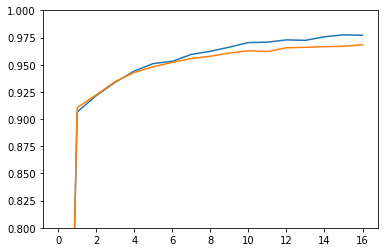

In [101]:
plt.plot(x, train_neuralnet.train_acc_list)
plt.plot(x, train_neuralnet.test_acc_list)
plt.ylim([0.8,1.0])

In [102]:
x = np.arange(len(train_neuralnet.train_loss_list))
print(len(x))

10000


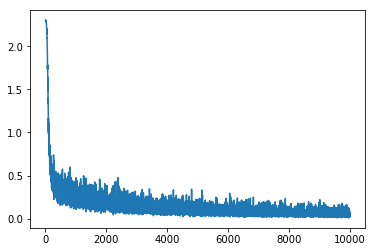

In [107]:
plt.plot(x, train_neuralnet.train_loss_list)
# plt.ylim([0,1.0])

- 진동을 하는 이유는 gradient descent를 썼기 때문이다!!

(0, 1000)

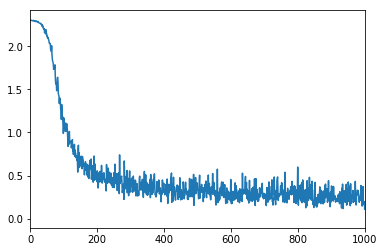

In [111]:
plt.plot(x, train_neuralnet.train_loss_list)
plt.xlim([0,1000])

### 정리
- 계산 그래프를 이용하면 계산과정을 시각적으로 파악할 수 있다.
- 계산 그래프의 노드는 국소적 계산으로 구성되며 국소적 계산을 조합하여 전체 계산을 구성한다.
- 계산 그래프의 순전파는 통산의 계산을 수행한다. 한편, 계산 그래프의 역전파로는 각 노드의 미분을 구할 수 있다.
- 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다.(역전파)
- 수치 미분과 역전파의 결과를 비교하면 역전파의 구현에 잘못이 없는지 확인할 수 있다.(기울기 확인)